##### Github Link : https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-klbaligala94

#### Goal: 
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

In [1]:
%matplotlib inline
#Import Data Processing and Visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Import Data Modeling and Predicting Libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score,precision_score, f1_score, roc_auc_score,roc_curve,accuracy_score
from sklearn.tree import export_graphviz

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from IPython.display import Image  
import pydotplus
import graphviz
from os import system
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

#Notebook Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import dataset to Python
bank_ds = pd.read_csv("bank-full.csv")

In [3]:
#Check on the dataset if imported properly
bank_ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Univariate Analysis

Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

In [4]:
#Variable quick check
#You can see that there are no null values that are visible in the dataset
#Along with these are the information of each variable data type.
bank_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Statistical summary metrics for the numeric variables
bank_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
#Corresponding frequency distribution for all categorical variables
for i in list(bank_ds.columns[bank_ds.dtypes=='object']):   # checking value counts of all object type columns
    print(bank_ds[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

* With the categorical variables in the dataset, you will see significant presence of 'unknown' categories.
* Though, most of these are significant % of the entire dataset, we will retain them and treat as a separate level when doing the predicting processes.
* Other variables with minimal % of unknowns, we can get the modes of the non-unknown values and replace them with that. For instance, we will be doing that on the 'Job' variable later. Replace 'unknown' as 'blue-collar'.


In [7]:
#Data Preparation for Visualization

#Extract Numeric variables from the dataset
columns = list(bank_ds)
columns_num = [i for i in columns if i in ('age','balance','duration','campaign','pdays','previous')]
columns_num

#Extract Categorical variables from the dataset
columns_cat = [j for j in columns if j not in ('age','balance','duration','campaign','pdays','previous')]
columns_cat

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'poutcome',
 'Target']

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'age Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'balance Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'duration Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'campaign Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'pdays Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'previous Overall Distribution')

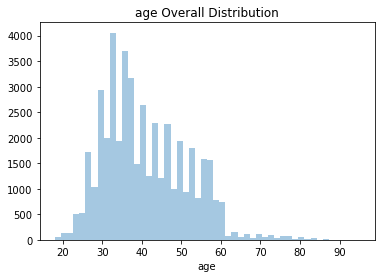

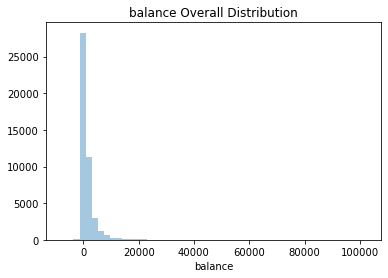

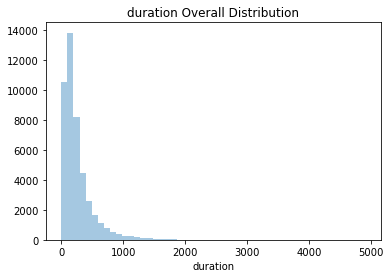

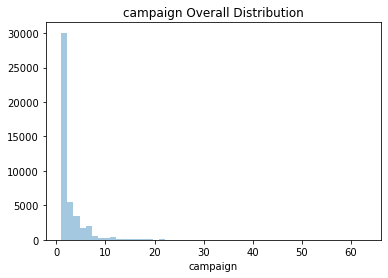

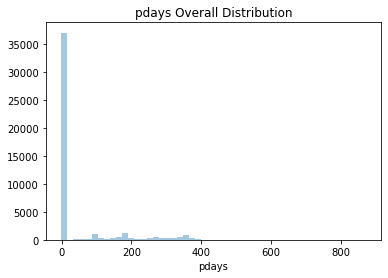

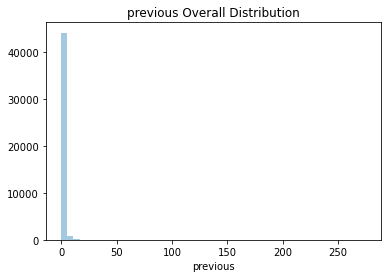

In [8]:
#Histogram for all numeric variables in the dataset
for column in columns_num:
    plt.figure()  
    sns.distplot(bank_ds[column],kde=False).set_title(column + ' Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'age Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'balance Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'duration Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'campaign Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'pdays Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'previous Boxplot Distribution')

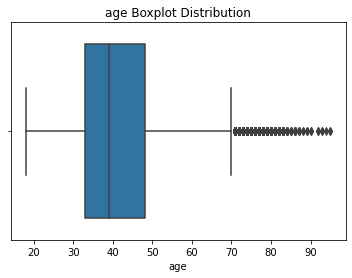

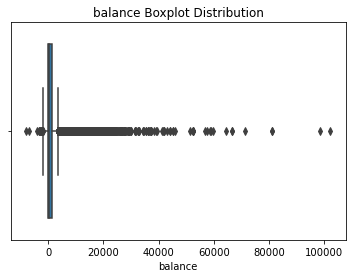

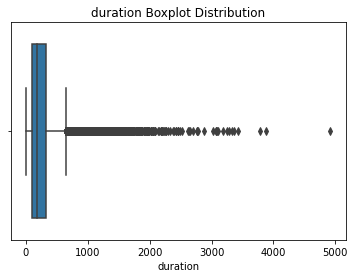

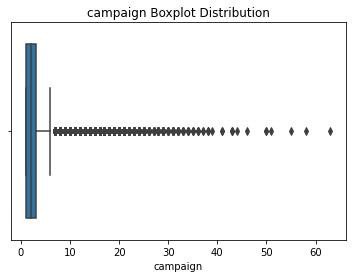

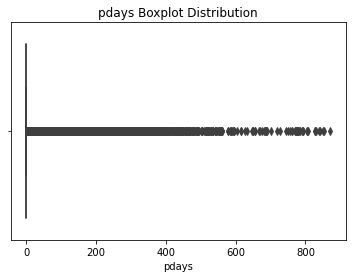

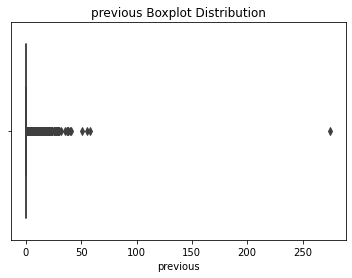

In [9]:
#Boxplot for numeric variables
for column in columns_num:
    plt.figure()  
    sns.boxplot(bank_ds[column]).set_title(column + ' Boxplot Distribution')

#### Histogram and Box Plots: Distribution of Numeric variables in the dataset

* All of numeric variables are heavily skewed to right distributed
* Based on box plots, variables such as Previous, campaign, duration, balance and age do have outliers values. To address this, I am not going to delete these records rather I am going to cap them to values close to their 99th percentile for each.


In [10]:
#Extract percentiles of each variable
for column in columns_num:
    np.percentile(bank_ds[column], [10,20,30,40,50,60,70,80,90,95,99.98,99.99,100])
    print(column) 

array([29.   , 32.   , 34.   , 36.   , 39.   , 42.   , 46.   , 51.   ,
       56.   , 59.   , 89.   , 92.479, 95.   ])

age


array([0.0000000e+00, 2.2000000e+01, 1.3100000e+02, 2.7200000e+02,
       4.4800000e+02, 7.0100000e+02, 1.1260000e+03, 1.8590000e+03,
       3.5740000e+03, 5.7680000e+03, 5.8915704e+04, 6.8860693e+04,
       1.0212700e+05])

balance


array([  58.   ,   89.   ,  117.   ,  147.   ,  180.   ,  223.   ,
        280.   ,  368.   ,  548.   ,  751.   , 3101.664, 3343.076,
       4918.   ])

duration


array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  4.,  5.,  8., 43., 50., 63.])

campaign


array([ -1.   ,  -1.   ,  -1.   ,  -1.   ,  -1.   ,  -1.   ,  -1.   ,
        -1.   , 185.   , 317.   , 804.958, 834.353, 871.   ])

pdays


array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   2.   ,   3.   ,  36.916,  40.479, 275.   ])

previous


In [11]:
#Based on the estimated values near 99th percentile, we are capping 4 values to 50
len(bank_ds[(bank_ds['previous']>50)])
bank_ds.loc[bank_ds.previous > 50, 'previous'] = 50

4

In [12]:
#Based on the estimated values near 99th percentile, we are capping 4 values to 50
len(bank_ds[(bank_ds['campaign']>50)])
bank_ds.loc[bank_ds.campaign > 50, 'campaign'] = 50

4

In [13]:
#Based on the estimated values near 99th percentile, we are capping 3 values to 3500
len(bank_ds[(bank_ds['duration']>3500)])
bank_ds.loc[bank_ds.duration > 3500, 'duration'] = 3500

3

In [14]:
#Based on the estimated values near 99th percentile, we are capping 4 values to 80000
len(bank_ds[(bank_ds['balance']>80000)])
bank_ds.loc[bank_ds.balance > 80000, 'balance'] = 80000

4

In [15]:
#Based on the estimated values near 99th percentile, we are capping 7 values to 90
len(bank_ds[(bank_ds['age']>90)])
bank_ds.loc[bank_ds.age > 90, 'age'] = 90

7

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'job Frequency Distribution')

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'marital Frequency Distribution')

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'education Frequency Distribution')

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'default Frequency Distribution')

no     98.197341
yes     1.802659
Name: default, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'housing Frequency Distribution')

yes    55.583818
no     44.416182
Name: housing, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'loan Frequency Distribution')

no     83.977351
yes    16.022649
Name: loan, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'contact Frequency Distribution')

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'day Frequency Distribution')

20    6.087014
18    5.104952
21    4.481210
17    4.288779
6     4.273296
5     4.224636
14    4.087501
8     4.074230
28    4.047688
7     4.018933
19    3.886222
29    3.859680
15    3.766782
12    3.545597
13    3.505784
30    3.463759
9     3.452700
11    3.271328
4     3.196125
16    3.129769
2     2.859923
27    2.479485
3     2.386587
26    2.289266
23    2.076928
22    2.001725
25    1.857955
31    1.422220
10    1.159010
24    0.988697
1     0.712216
Name: day, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'month Frequency Distribution')

may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227
oct     1.632346
sep     1.280662
mar     1.055053
dec     0.473336
Name: month, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'poutcome Frequency Distribution')

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: poutcome, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Target Frequency Distribution')

no     88.30152
yes    11.69848
Name: Target, dtype: float64

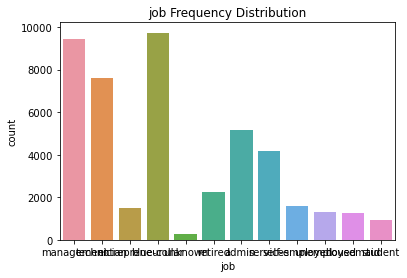

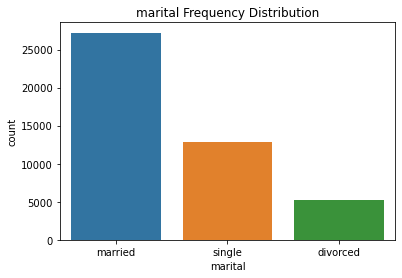

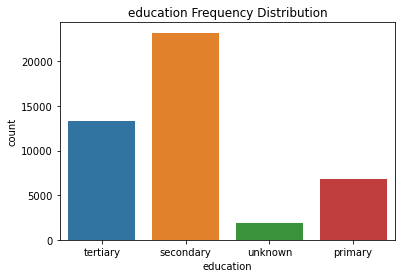

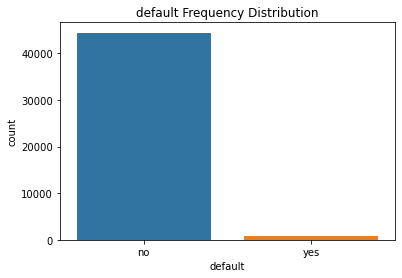

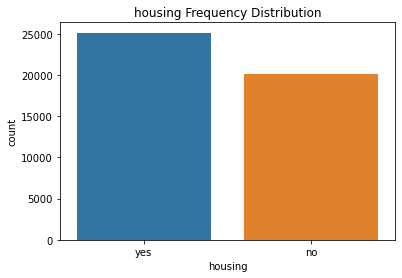

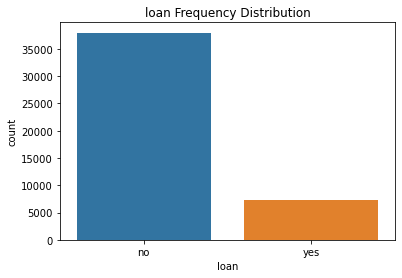

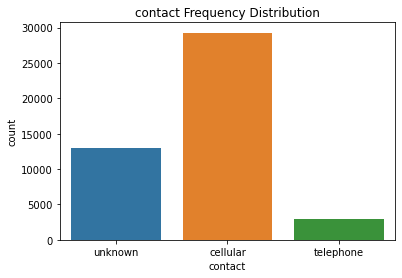

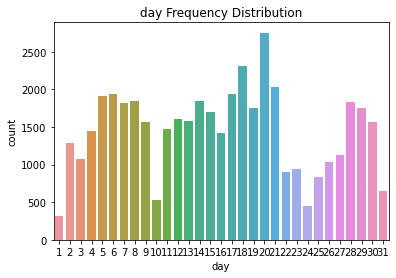

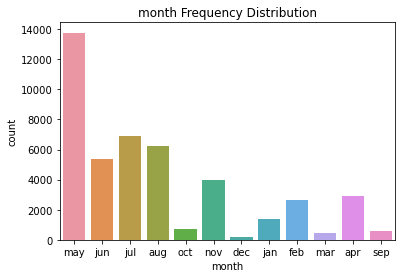

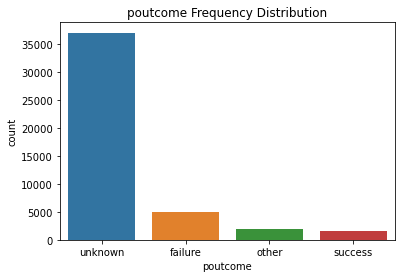

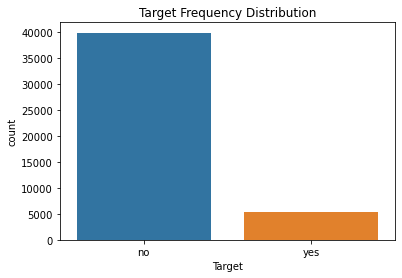

In [16]:
#Countplot for Categorical variables
for columnc in columns_cat:
    plt.figure()  
    sns.countplot(bank_ds[columnc]).set_title(columnc + ' Frequency Distribution')
    bank_ds[columnc].value_counts(normalize=True) * 100     #Percentage total across levels on each variable

#### Count plots: Frequency Distribution of Categorical variables in the dataset

* Most customers has no subsription to a term deposit.
* There are lots of unknown responses recorded from the previous marketing campaign.
* 21.5% of customers have blue-collar jobs.
* 60% of customers are married.
* More than half of the customers have secondary education.
* Most customers do not have housing and personal loan and credit in default.
* 64% are contacted thru cellular and rest are mostly without records.
* May has been the month where customer gets last contacted.

### Bivariate Analysis

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'age Boxplot Distribution Across Target')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'balance Boxplot Distribution Across Target')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'duration Boxplot Distribution Across Target')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'campaign Boxplot Distribution Across Target')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'pdays Boxplot Distribution Across Target')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'previous Boxplot Distribution Across Target')

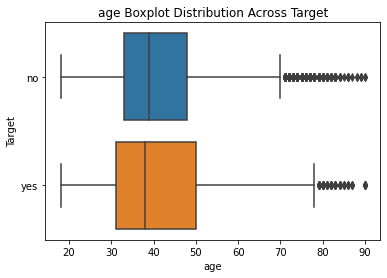

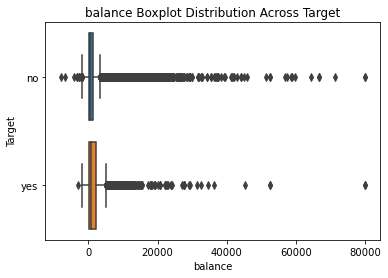

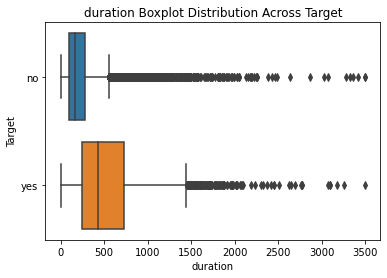

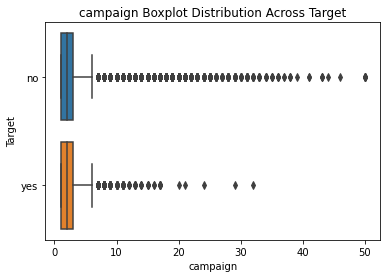

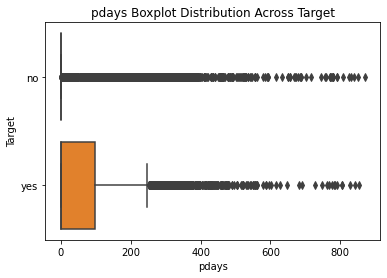

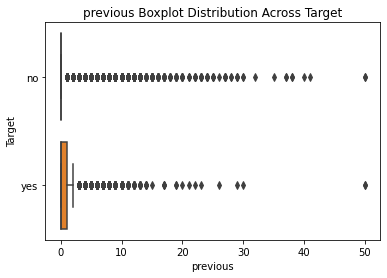

In [17]:
#Bivariate Boxplot Across Targets
for column in columns_num:
    plt.figure()  
    sns.boxplot(bank_ds[column], bank_ds['Target']).set_title(column + ' Boxplot Distribution Across Target')
    

* Distribution of numeric variables across target is fairly similar.
* All are heavy skewed to the right distributed.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'job Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'marital Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'education Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'default Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'housing Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'loan Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'contact Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'day Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'month Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'poutcome Frequency Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Target Frequency Distribution')

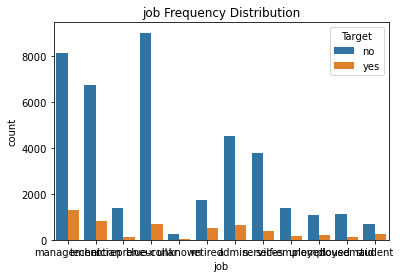

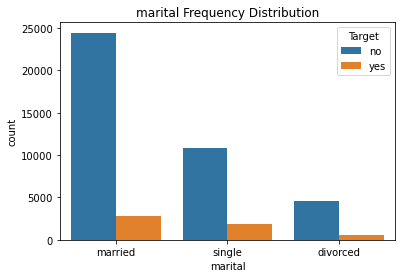

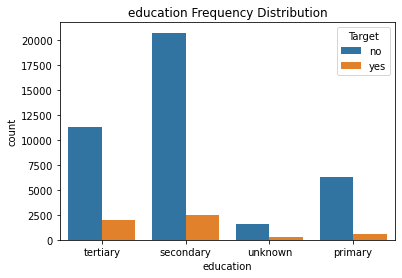

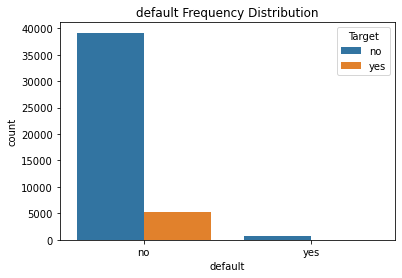

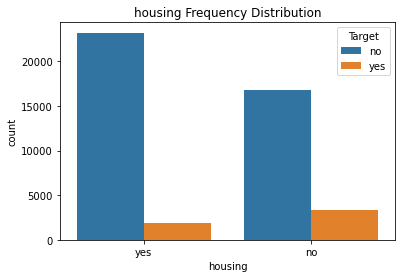

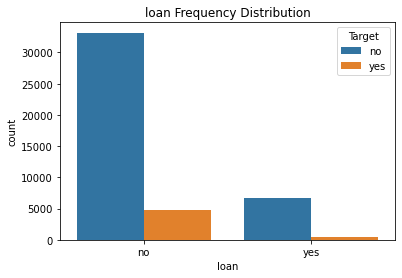

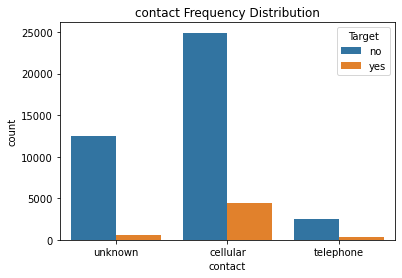

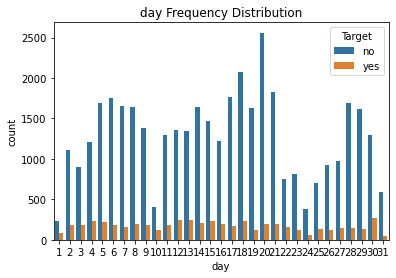

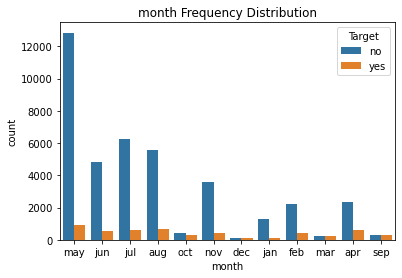

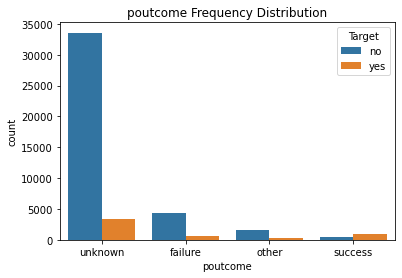

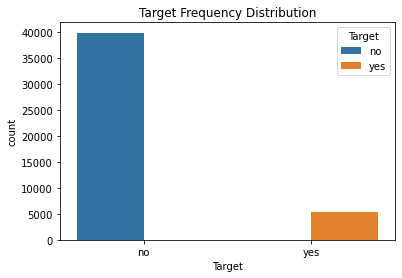

In [18]:
#Bivariate Countplot
for columnc in columns_cat:
    plt.figure()  
    sns.countplot(bank_ds[columnc],hue=bank_ds['Target']).set_title(columnc + ' Frequency Distribution')
 

* There have been mode successes with the previous marketing campaign for client who subscribed in a term deposit.
* Patterns for variables across different target values are similar.

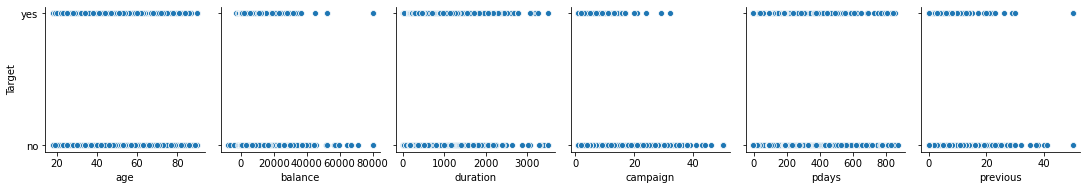

In [19]:
sns.pairplot(bank_ds, x_vars=['age','balance','duration','campaign','pdays','previous'], y_vars=['Target'])

* Target variable is distributed fairly across values of numeric variable, so it's a little harder to visualize relationship by just looking at these.

<Figure size 720x576 with 0 Axes>

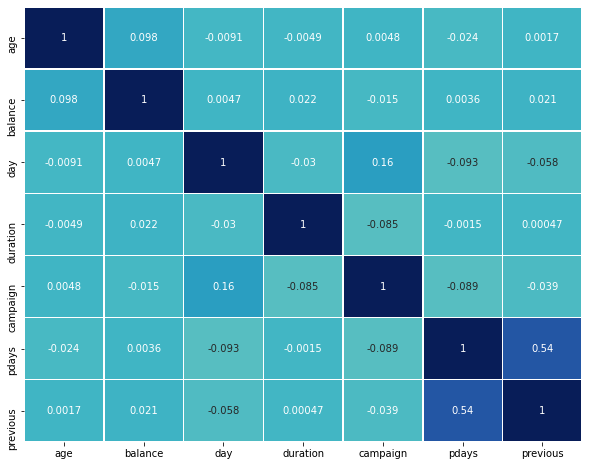

In [20]:
#Correlation Plot
plt.figure(figsize=(10,8))

sns.heatmap(bank_ds.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

* Pdays and previous have positive correlation. Though, this might not be strong enough so we can retain both in the process.

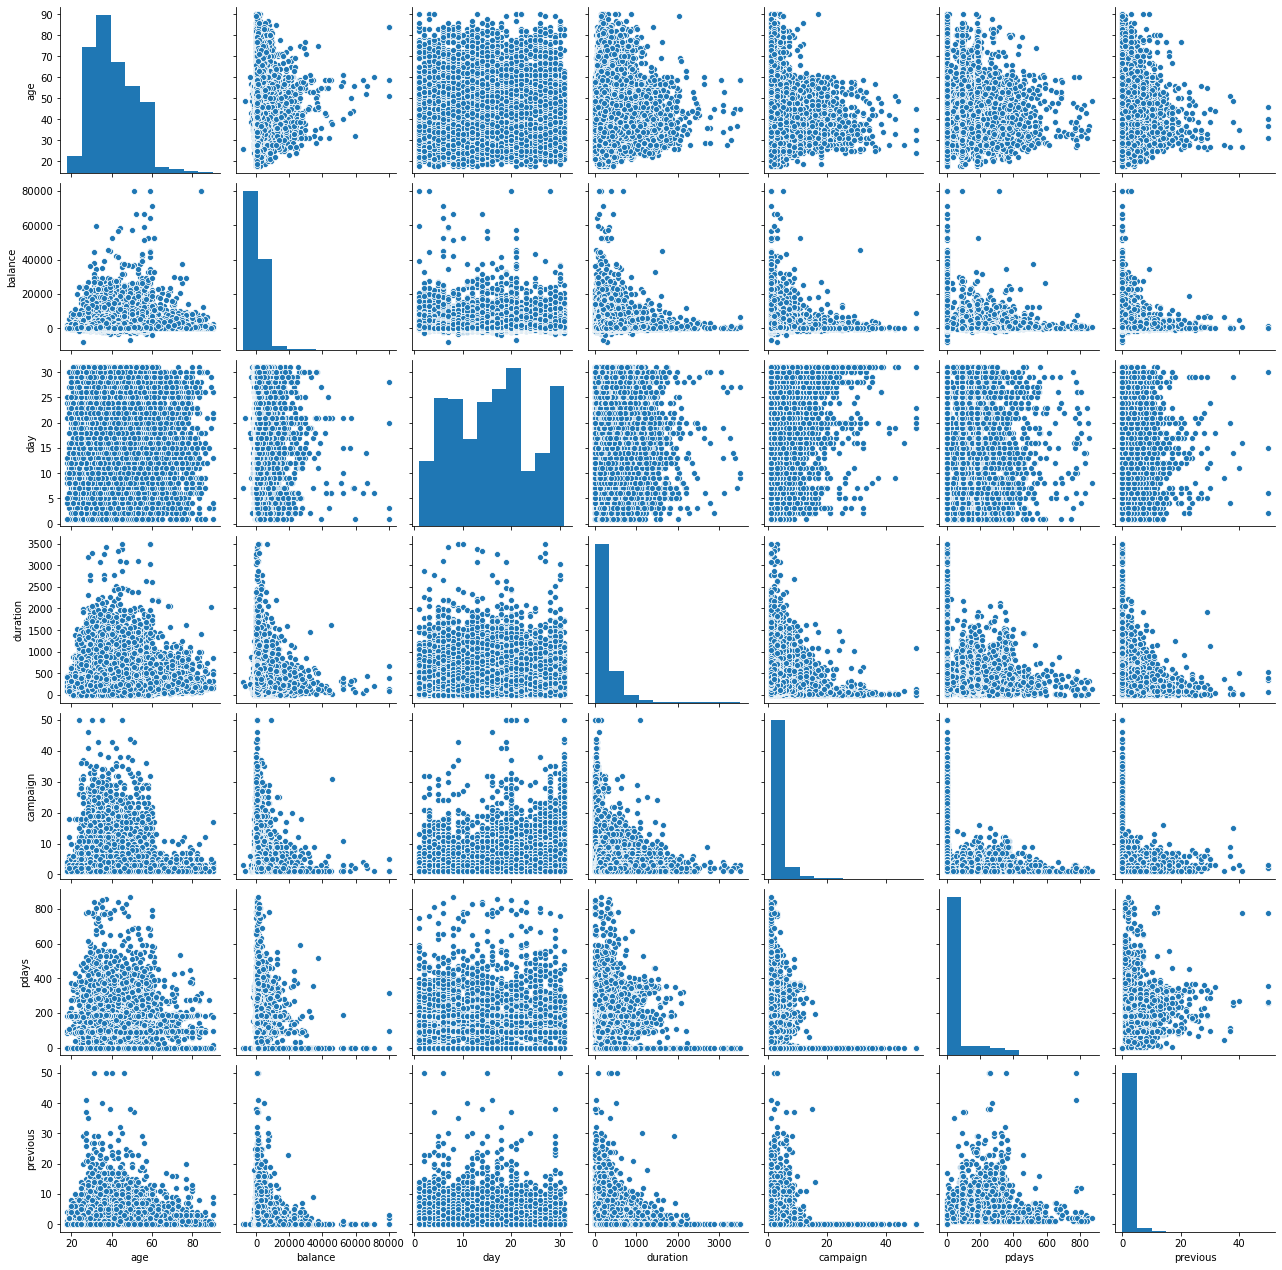

In [21]:
#Additional pairplots for all numeric independent varsb
sns.pairplot(bank_ds)

### Prepare the data for analytics

In [22]:
for feature in bank_ds.columns: # Loop through all columns in the dataframe
    if bank_ds[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_ds[feature] = pd.Categorical(bank_ds[feature])# Replace strings with an integer

In [23]:
#Make some modifications
replaceStruct = {
                "Target": {"yes":1, "no":0},
                "default": {"yes":1 , "no":0},
                "housing": {"yes":1 , "no":0},
                "loan": {"yes":1, "no":0},
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "contact": {"cellular": 1, "telephone":2 , "unknown":-1},
                 "poutcome": {"failure": 1, "success":2 , "other": 3,"unknown": -1},
                 "job":     {"unknown": "blue-collar"},
                "month": {"jan":1,"feb":2,"mar":3, "apr":4, "may":5, "jun":6 , "jul":7, "aug":8, "sep":9, "oct":10, "nov":11 ,"dec":12}
            }
oneHotCols=["job","marital"]

In [24]:
bank_ds=bank_ds.replace(replaceStruct)
bank_ds=pd.get_dummies(bank_ds, columns=oneHotCols)
bank_ds.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,58,3,0,2143,1,0,-1,5,5,261,...,1,0,0,0,0,0,0,0,1,0
1,44,2,0,29,1,0,-1,5,5,151,...,0,0,0,0,0,1,0,0,0,1
2,33,2,0,2,1,1,-1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,-1,0,1506,1,0,-1,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,-1,0,1,0,0,-1,5,5,198,...,0,0,0,0,0,0,0,0,0,1


In [25]:
#Create dataframes for the predictors vs outcome variable

X = bank_ds.drop('Target',axis=1)     # Predictor feature columns (8 X m)
Y = bank_ds['Target']   # Predicted class (1=True, 0=False) (1 X m)

#Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

x_train.shape
x_test.shape

(31647, 28)

(13564, 28)

### Create Ensemble Models

#### Logistic Regression

In [26]:
logreg =LogisticRegression(random_state=1,penalty='l1', solver='liblinear',C=0.5) 

In [27]:
logreg.fit(x_train, y_train)

LogisticRegression(C=0.5, penalty='l1', random_state=1, solver='liblinear')

In [28]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.8939867917970108

Testing accuracy 0.8913299911530522

Confusion Matrix


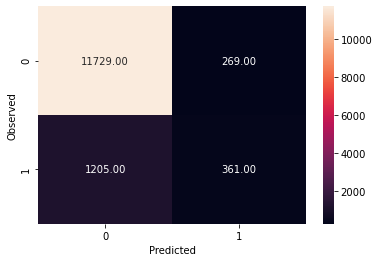

None

Recall: 0.2305236270753512

Precision: 0.573015873015873

F1 Score: 0.32877959927140255

Roc Auc Score: 0.6040516118373922


In [29]:
y_predict = logreg.predict(x_test)
print("Training accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [30]:
#Logistic Regression
ACC_LR = accuracy_score(y_test,y_predict)
R_LR = recall_score(y_test,y_predict)
P_LR = precision_score(y_test,y_predict)
F1_LR= f1_score(y_test,y_predict)

In [31]:
#Store the metrics for each model in a dataframe for final comparison
LR_DF = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': ACC_LR, 'Recall': R_LR ,'Precision': P_LR, 'F1_Score': F1_LR})
LR_DF

,Method,Accuracy,Recall,Precision,F1_Score
0,Logistic Regression,0.89133,0.230524,0.573016,0.32878


#### Decision Trees

In [32]:
#Choose 5 as max_depth as it didn't overfit testing data as well
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1, max_depth=5)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [33]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9034031661768888
0.9005455617811855


In [34]:
train_char_label = ['No', 'Yes']
Bank_Tree_File = open('bank_ds_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Bank_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Bank_Tree_File.close()

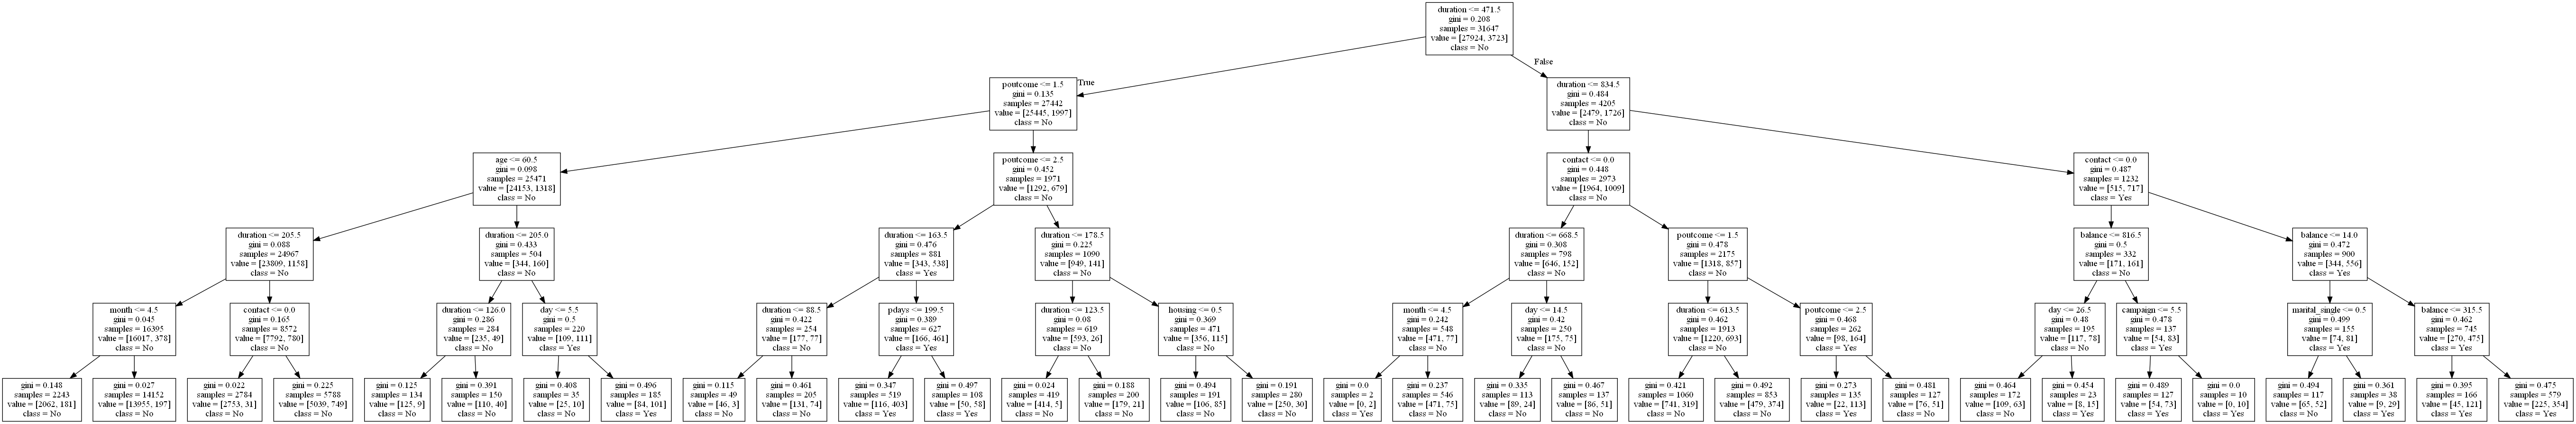

In [35]:
#Works only if "dot" command works on you machine
retCode = system("dot -Tpng bank_ds_tree.dot -o bank_ds_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("bank_ds_tree.png"))


In [36]:
print(pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns))

                        Imp
age                0.036075
education          0.000000
default            0.000000
balance            0.006845
housing            0.012882
loan               0.000000
contact            0.054419
day                0.005201
month              0.010052
duration           0.568654
campaign           0.001665
pdays              0.005094
previous           0.000000
poutcome           0.296218
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
marital_divorced   0.000000
marital_married    0.000000
marital_single     0.002895


0.9005455617811855


<Figure size 504x360 with 0 Axes>

Training accuracy 0.9034031661768888

Testing accuracy 0.9005455617811855

Recall: 0.31992337164750956

Precision: 0.6382165605095541

F1 Score: 0.42620161633347514

Roc Auc Score: 0.6481263799394408


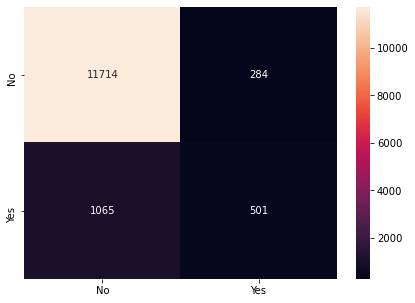

In [37]:
print(dTree.score(x_test , y_test))
y_predict_dtree = dTree.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict_dtree, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print("Training accuracy",dTree.score(x_train,y_train))  
print()
print("Testing accuracy",dTree.score(x_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict_dtree))
print()
print("Precision:",precision_score(y_test,y_predict_dtree))
print()
print("F1 Score:",f1_score(y_test,y_predict_dtree))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_dtree))

In [38]:
#Decision Trees metrics
ACC_DT = accuracy_score(y_test,y_predict_dtree)
R_DT = recall_score(y_test,y_predict_dtree)
P_DT = precision_score(y_test,y_predict_dtree)
F1_DT= f1_score(y_test,y_predict_dtree)

In [39]:
#Store the metrics for each model in a dataframe for final comparison
DT_DF = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': ACC_DT, 'Recall': R_DT ,'Precision': P_DT, 'F1_Score': F1_DT})
DT_DF

,Method,Accuracy,Recall,Precision,F1_Score
0,Decision Tree,0.900546,0.319923,0.638217,0.426202


#### Bagging

In [40]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, y_train)

0.9018726039516367


<Figure size 504x360 with 0 Axes>

Recall: 0.33780332056194123

Precision: 0.6427703523693803

F1 Score: 0.44286312264545835

Roc Auc Score: 0.6566496182739695


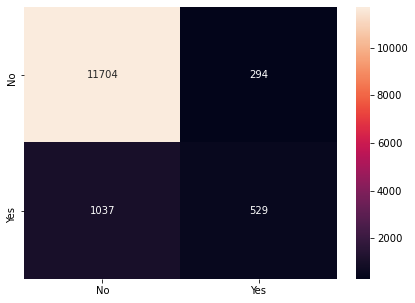

In [41]:
y_predict_bgcl = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm_bgcl=metrics.confusion_matrix(y_test, y_predict_bgcl,labels=[0, 1])

df_bgcl = pd.DataFrame(cm_bgcl, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_bgcl, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict_bgcl))
print()
print("Precision:",precision_score(y_test,y_predict_bgcl))
print()
print("F1 Score:",f1_score(y_test,y_predict_bgcl))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_bgcl))

In [42]:
#Bagging metrics
ACC_BAG = accuracy_score(y_test,y_predict_bgcl)
R_BAG = recall_score(y_test,y_predict_bgcl)
P_BAG = precision_score(y_test,y_predict_bgcl)
F1_BAG= f1_score(y_test,y_predict_bgcl)

#Store the metrics for each model in a dataframe for final comparison
BAG_DF = pd.DataFrame({'Method':['Bagging'], 'Accuracy': ACC_BAG, 'Recall': R_BAG ,'Precision': P_BAG, 'F1_Score': F1_BAG})
BAG_DF

,Method,Accuracy,Recall,Precision,F1_Score
0,Bagging,0.901873,0.337803,0.64277,0.442863


#### AdaBoosting

In [43]:
abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8961958124447066


<Figure size 504x360 with 0 Axes>

Recall: 0.34163473818646234

Precision: 0.5866228070175439

F1 Score: 0.43179983857949955

Roc Auc Score: 0.655106417267927


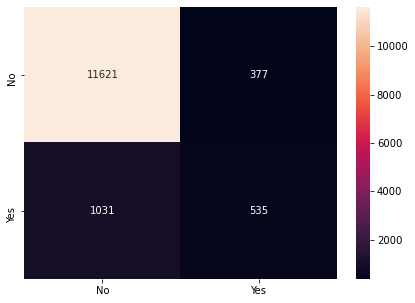

In [44]:
y_predict_abcl = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm_abcl=metrics.confusion_matrix(y_test, y_predict_abcl,labels=[0, 1])

df_abcl = pd.DataFrame(cm_abcl, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_abcl, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict_abcl))
print()
print("Precision:",precision_score(y_test,y_predict_abcl))
print()
print("F1 Score:",f1_score(y_test,y_predict_abcl))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_abcl))

In [45]:
#Adaboost metrics
ACC_AB = accuracy_score(y_test,y_predict_abcl)
R_AB = recall_score(y_test,y_predict_abcl)
P_AB = precision_score(y_test,y_predict_abcl)
F1_AB= f1_score(y_test,y_predict_abcl)

#Store the metrics for each model in a dataframe for final comparison
AB_DF = pd.DataFrame({'Method':['AdaBoost'], 'Accuracy': ACC_AB, 'Recall': R_AB ,'Precision': P_AB, 'F1_Score': F1_AB})
AB_DF

,Method,Accuracy,Recall,Precision,F1_Score
0,AdaBoost,0.896196,0.341635,0.586623,0.4318


#### Gradient Boosting

In [46]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.9034945443821881


<Figure size 504x360 with 0 Axes>

Recall: 0.34227330779054915

Precision: 0.6576687116564417

F1 Score: 0.45023099538009237

Roc Auc Score: 0.659509716072304


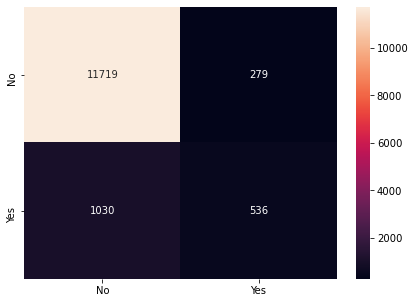

In [47]:
y_predict_gbcl = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm_gbcl=metrics.confusion_matrix(y_test, y_predict_gbcl,labels=[0, 1])

df_gbcl = pd.DataFrame(cm_gbcl, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_gbcl, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict_gbcl))
print()
print("Precision:",precision_score(y_test,y_predict_gbcl))
print()
print("F1 Score:",f1_score(y_test,y_predict_gbcl))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_gbcl))

In [48]:
#Gradient Boosting metrics
ACC_GB = accuracy_score(y_test,y_predict_gbcl)
R_GB = recall_score(y_test,y_predict_gbcl)
P_GB = precision_score(y_test,y_predict_gbcl)
F1_GB= f1_score(y_test,y_predict_gbcl)

#Store the metrics for each model in a dataframe for final comparison
GB_DF = pd.DataFrame({'Method':['Gradient Boosting'], 'Accuracy': ACC_GB, 'Recall': R_GB ,'Precision': P_GB, 'F1_Score': F1_GB})
GB_DF

,Method,Accuracy,Recall,Precision,F1_Score
0,Gradient Boosting,0.903495,0.342273,0.657669,0.450231


#### Random Forest

In [49]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.9035682689472132


<Figure size 504x360 with 0 Axes>

Recall: 0.4157088122605364

Precision: 0.6235632183908046

F1 Score: 0.4988505747126437

Roc Auc Score: 0.6914766765086645


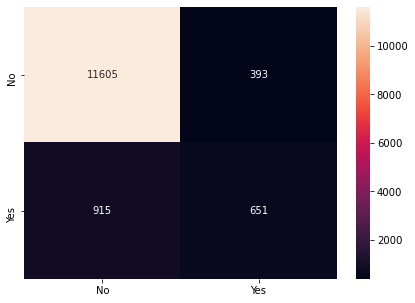

In [50]:
y_predict_rfcl = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm_rfcl=metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[0, 1])

df_rfcl = pd.DataFrame(cm_rfcl, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_rfcl, annot=True ,fmt='g')

print("Recall:",recall_score(y_test,y_predict_rfcl))
print()
print("Precision:",precision_score(y_test,y_predict_rfcl))
print()
print("F1 Score:",f1_score(y_test,y_predict_rfcl))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict_rfcl))

In [51]:
#Random Forest metrics
ACC_RF = accuracy_score(y_test,y_predict_rfcl)
R_RF = recall_score(y_test,y_predict_rfcl)
P_RF = precision_score(y_test,y_predict_rfcl)
F1_RF = f1_score(y_test,y_predict_rfcl)

#Store the metrics for each model in a dataframe for final comparison
RF_DF = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': ACC_RF, 'Recall': R_RF ,'Precision': P_RF, 'F1_Score': F1_RF})
RF_DF

,Method,Accuracy,Recall,Precision,F1_Score
0,Random Forest,0.903568,0.415709,0.623563,0.498851


In [52]:
OverallResults = pd.concat([LR_DF, DT_DF,BAG_DF,AB_DF,GB_DF,RF_DF])
OverallResults

,Method,Accuracy,Recall,Precision,F1_Score
0,Logistic Regression,0.891330,0.230524,0.573016,0.328780
0,Decision Tree,0.900546,0.319923,0.638217,0.426202
0,Bagging,0.901873,0.337803,0.642770,0.442863
0,AdaBoost,0.896196,0.341635,0.586623,0.431800
0,Gradient Boosting,0.903495,0.342273,0.657669,0.450231
0,Random Forest,0.903568,0.415709,0.623563,0.498851


#### Conclusion:

All algorithms from logistic regression down to random forest seems to give us performance metrics that are near to each other and might not be significantly different from one another. However, it is noticeable as well the lift provided by Random Forest so with this, I will choose Random Forest as the best approach, not only as it gives a high accuracy but a fair balance between recall and precision metrics. As you might notice, all of them provide unappealing precision and recall metrics but amongst them RF provides a nearer difference between these two metrics, and thus having the highest F1 Score which is the measure of robustness of the model. Among these, I can say RF is the most robust and should be used.